In [209]:
import pandas as pd

# Read both sheets from the Excel file
frequent_flyer_df = pd.read_excel("_Delta Airlines Loyalty Customer Cleansed Data.xlsx", 
                                sheet_name='Frequent Flier Cleansed1')
upcoming_flights_df = pd.read_excel("_Delta Airlines Loyalty Customer Cleansed Data.xlsx", 
                                  sheet_name='Flier Upcoming Flights')

# Display initial information about both dataframes
print("Frequent Flyer DataFrame Shape:", frequent_flyer_df.shape)
print("\nFrequent Flyer Columns:", frequent_flyer_df.columns.tolist())
print("\nUpcoming Flights DataFrame Shape:", upcoming_flights_df.shape)
print("\nUpcoming Flights Columns:", upcoming_flights_df.columns.tolist())

# Merge the dataframes
# We'll merge on 'Frequent Flier Number' which should be the common key between the two sheets
merged_df = pd.merge(frequent_flyer_df, 
                    upcoming_flights_df, 
                    on='Frequent Flier Number', 
                    how='left')

# Display information about the merged dataframe
print("\nMerged DataFrame Shape:", merged_df.shape)
print("\nMerged DataFrame Columns:", merged_df.columns.tolist())

# Display the first few rows of the merged dataframe
print("\nFirst few rows of merged dataframe:")
display(merged_df.head())

Frequent Flyer DataFrame Shape: (9211, 18)

Frequent Flyer Columns: ['Record Creation Date', 'Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport', 'Arrival Airport', 'Planned Snack?', 'Additional Snack?', '# of Included Checked Bags', 'Total # of Checked Bags', 'Flight Delayed?', 'Lead Source', 'Online Check-In', 'Add-On Spend']

Upcoming Flights DataFrame Shape: (15078, 15)

Upcoming Flights Columns: ['Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Flight Number', 'Flight Date', 'Departing City', 'Arrival City', 'Departure Time', 'Departure Time Zone', 'Arrival Time', 'Arrival Time Zone', 'Cost', 'Car Rental Addon $', 'Hotel Addon $']

Merged DataFrame Shape: (69211, 32)

Merged DataFrame Columns: ['Record Creation Date', 'Join Date_x', 'Frequent Flier Number', 'First Name_x', 'Last Name_x', 'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport', 'Arrival Airp

,Record Creation Date,Join Date_x,Frequent Flier Number,First Name_x,Last Name_x,Inquiry Type,Most Recent Flight #,Lounge Used?,Departing Airport,Arrival Airport,...,Flight Date,Departing City,Arrival City,Departure Time,Departure Time Zone,Arrival Time,Arrival Time Zone,Cost,Car Rental Addon $,Hotel Addon $
0,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,2025-04-14,Houston,London,09:38:00,CST,15:38:00,UTC,613.83 USD,210.53 USD,195.49 USD
1,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,2025-04-29,Boston,Dubai,02:38:00,MST,07:38:00,UTC,741.1 AUD,51.58 AUD,323.6 AUD
2,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,2024-10-05,Dubai,Toronto,09:38:00,UTC,14:38:00,UTC,191.79 AUD,151.44 AUD,369.05 AUD
3,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,2025-04-30,Atlanta,Boston,00:38:00,PST,12:38:00,UTC,515.74 USD,164.58 USD,111.11 USD
4,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,2025-08-31,Sydney,New York,22:38:00,UTC,05:38:00,UTC,352.38 JPY,201.22 JPY,128.41 JPY


In [217]:
# Step 1: Remove currency symbols and convert to numeric
def clean_currency_column(df, column_name):
    df[column_name] = df[column_name].replace({' GBP': '', ' USD': '', ' JPY': '', ' AUD': '', ' EUR': '', ',': ''}, regex=True)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convert to numeric and handle errors

# Clean the relevant columns
clean_currency_column(merged_df, 'Cost')
clean_currency_column(merged_df, 'Car Rental Addon $')
clean_currency_column(merged_df, 'Hotel Addon $')

# Step 2: Handle missing data - Drop rows with any missing values (you could also choose to fill missing values)
merged_df = merged_df.dropna(subset=['Cost', 'Car Rental Addon $', 'Hotel Addon $'])

# Step 3: Verify if there are still non-numeric columns in the dataset
print(merged_df.dtypes)  # Check the data types of the columns to ensure they are numeric


Record Creation Date          datetime64[ns]
Join Date_x                   datetime64[ns]
Frequent Flier Number                  int64
First Name_x                          object
Last Name_x                           object
Inquiry Type                          object
Most Recent Flight #                  object
Lounge Used?                           int32
Departing Airport                     object
Arrival Airport                       object
Planned Snack?                          bool
Additional Snack?                       bool
# of Included Checked Bags             int64
Total # of Checked Bags                int64
Flight Delayed?                        int32
Lead Source                           object
Online Check-In                         bool
Add-On Spend                         float64
Join Date_y                   datetime64[ns]
First Name_y                          object
Last Name_y                           object
Flight Number                         object
Flight Dat

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
# Step 1: Check for missing values and handle them
merged_df = merged_df.dropna()  # Dropping rows with missing values for simplicity

# Step 2: Encode categorical variables (For example, 'Lounge Used?' and 'Flight Delayed?')
merged_df['Lounge Used?'] = merged_df['Lounge Used?'].astype(int)  # Converting boolean to int (0 or 1)
merged_df['Flight Delayed?'] = merged_df['Flight Delayed?'].astype(int)

# Step 3: Convert dates to numerical features (e.g., year, month, and day)
merged_df['Record Creation Date'] = pd.to_datetime(merged_df['Record Creation Date'])
merged_df['Join Date_x'] = pd.to_datetime(merged_df['Join Date_x'])

merged_df['Account Age'] = (merged_df['Record Creation Date'] - merged_df['Join Date_x']).dt.days

# Step 4: Select features (drop irrelevant columns for prediction)
features = merged_df[['Account Age', 'Lounge Used?', 'Flight Delayed?', 'Add-On Spend', 'Cost']]  # Example features
target = merged_df['Flight Delayed?']  # Assuming we're predicting whether the flight was delayed as a proxy for attrition

# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 6: Standardize the data (Scaling numerical features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the preprocessed data
print(X_train_scaled[:5])


[[-1.46978612  0.99478629  0.99350167 -0.26351708 -1.54066399]
 [ 0.04459758 -1.00524103  0.99350167  2.97131633 -0.42762079]
 [-1.01798947  0.99478629  0.99350167 -0.58017999  0.92334848]
 [ 0.02780784  0.99478629 -1.00654083  2.46322775  0.94929917]
 [ 0.01966736 -1.00524103 -1.00654083  2.40686679  0.22693463]]


In [221]:
# Build a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error for Linear Regression:", mse)


Mean Squared Error for Linear Regression: 8.049364710015904e-32


In [223]:
# Build a logistic regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy for Logistic Regression:", accuracy)

# Classification Report
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Accuracy for Logistic Regression: 1.0

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4257
           1       1.00      1.00      1.00      4257

    accuracy                           1.00      8514
   macro avg       1.00      1.00      1.00      8514
weighted avg       1.00      1.00      1.00      8514



Linear Regression MSE: 8.049364710015904e-32
Logistic Regression Accuracy: 1.0


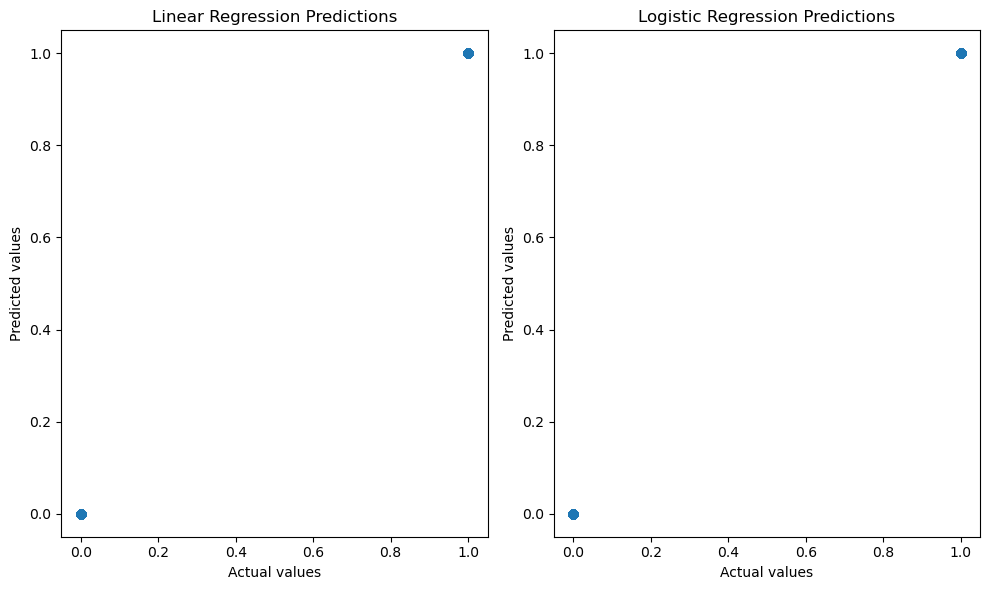

In [225]:
# Comparing MSE of Linear Regression with Accuracy of Logistic Regression
print("Linear Regression MSE:", mse)
print("Logistic Regression Accuracy:", accuracy)

# If you need to plot the comparison of predictions
plt.figure(figsize=(10, 6))

# Plot Linear Regression Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.title("Linear Regression Predictions")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

# Plot Logistic Regression Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_logistic)
plt.title("Logistic Regression Predictions")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()


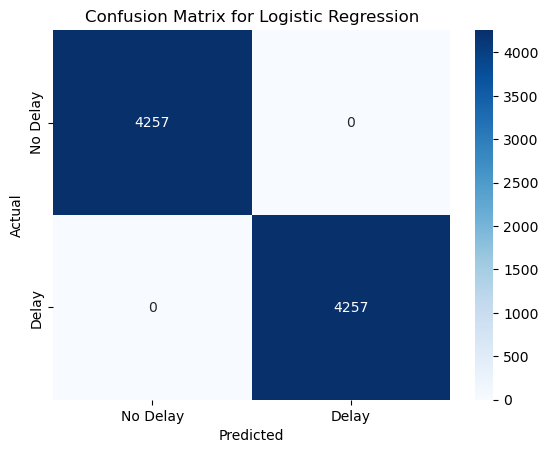

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)  # Fit the model to the training data

# Step 2: Generate predictions
y_pred_logreg = logreg.predict(X_test_scaled)  # Predict on the test data

# Step 3: Create confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Step 4: Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


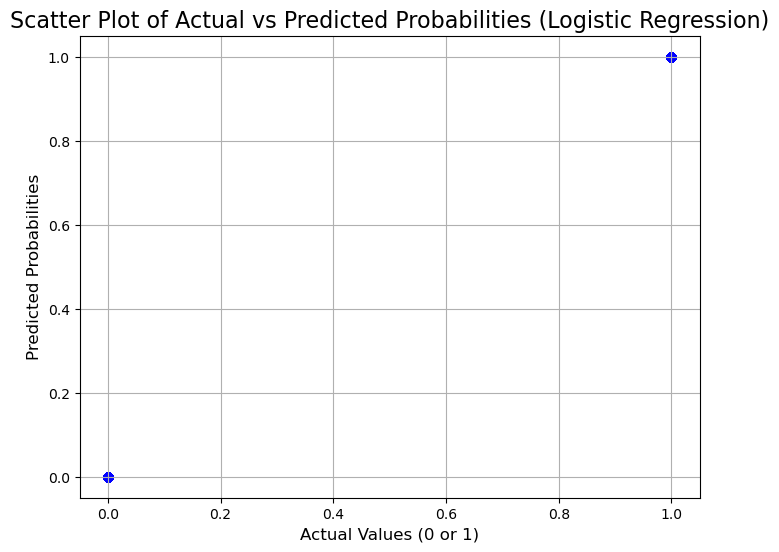

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities from logistic regression
y_pred_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability for class '1'

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_prob_logreg, alpha=0.5, color='blue', label='Predicted Probabilities')

# Plot settings
plt.title('Scatter Plot of Actual vs Predicted Probabilities (Logistic Regression)', fontsize=16)
plt.xlabel('Actual Values (0 or 1)', fontsize=12)
plt.ylabel('Predicted Probabilities', fontsize=12)
plt.grid(True)
plt.show()


In [255]:
# Adjusting the threshold for classification (set it lower if needed)
threshold = 0.6  # You can experiment with this value
y_pred_prob_weighted = logreg.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities
y_pred_adjusted = (y_pred_prob_weighted >= threshold).astype(int)  # Adjusted predictions based on threshold

# Now use `y_pred_adjusted` in further steps like confusion matrix and classification report


In [257]:
from sklearn.model_selection import cross_val_score

# Cross-validation with logistic regression
cross_val_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')  # Adjust cv as needed
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [259]:
from sklearn.metrics import confusion_matrix

# Confusion matrix with adjusted predictions
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4257    0]
 [   0 4257]]


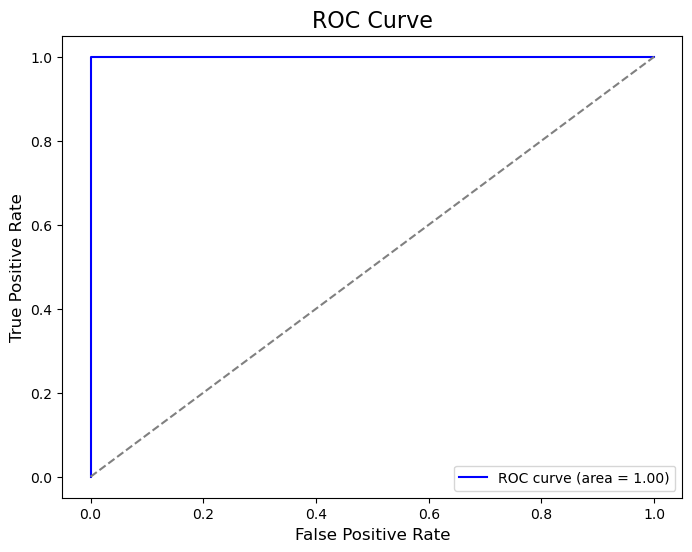

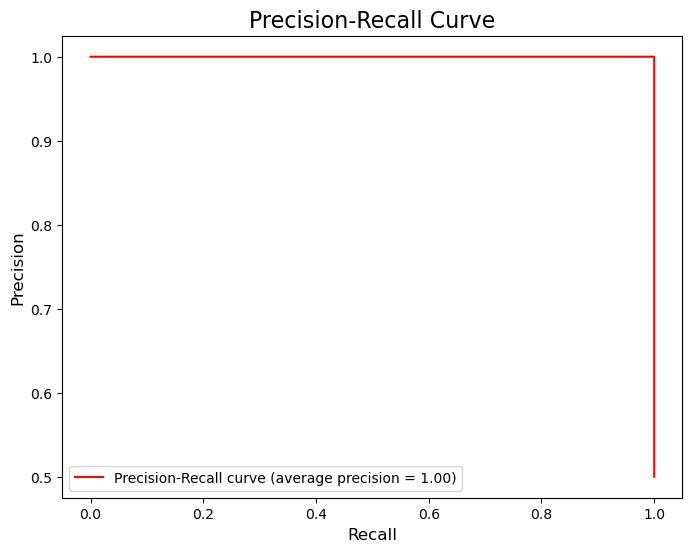

In [261]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_weighted)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob_weighted)
avg_precision = average_precision_score(y_test, y_pred_prob_weighted)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='r', label=f'Precision-Recall curve (average precision = {avg_precision:.2f})')
plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left')
plt.show()


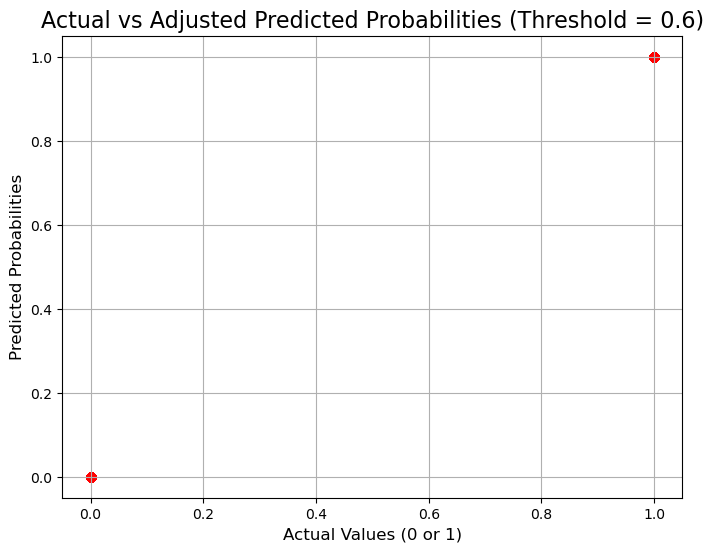

In [263]:
# Scatter plot for actual vs adjusted predicted probabilities
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_prob_weighted, alpha=0.5, color='red', label='Predicted Probabilities')
plt.title('Actual vs Adjusted Predicted Probabilities (Threshold = 0.6)', fontsize=16)
plt.xlabel('Actual Values (0 or 1)', fontsize=12)
plt.ylabel('Predicted Probabilities', fontsize=12)
plt.grid(True)
plt.show()


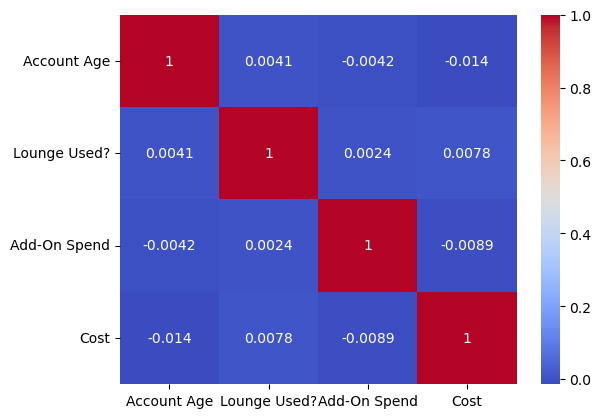

In [253]:
# Check for correlations among features
sns.heatmap(merged_df[['Account Age', 'Lounge Used?', 'Add-On Spend', 'Cost']].corr(), annot=True, cmap="coolwarm")
plt.show()


Confusion Matrix:
 [[4257    0]
 [   0 4257]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4257
           1       1.00      1.00      1.00      4257

    accuracy                           1.00      8514
   macro avg       1.00      1.00      1.00      8514
weighted avg       1.00      1.00      1.00      8514



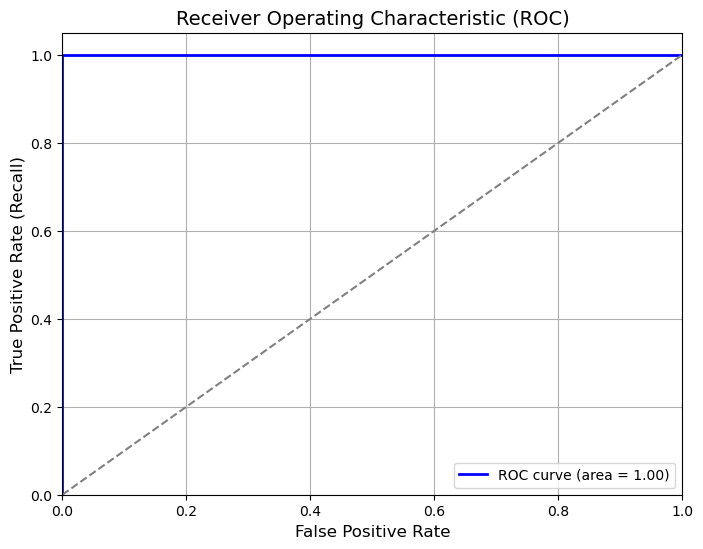

In [281]:
# 1. Apply regularization and class weights to logistic regression
logreg = LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 2. Generate predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# 3. Evaluate model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# 4. Check performance with ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for both classes
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


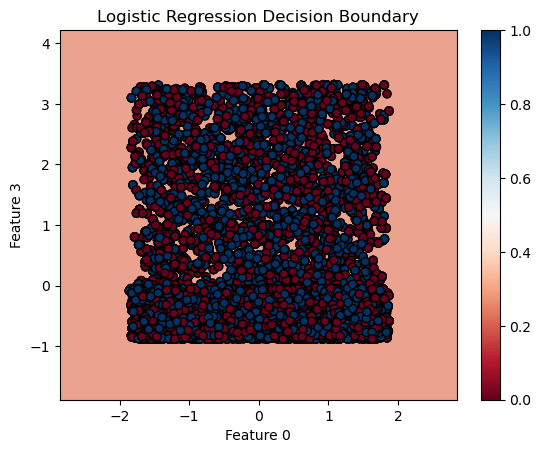

In [287]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select the two features for visualization (for example: Feature 0 and Feature 3)
X_train_2d = X_train_scaled[:, [0, 3]]  # Feature 0 and Feature 3

# Re-scale the selected two features for consistent scaling
scaler = StandardScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)

# Create a meshgrid for the plot (using only the 2 selected features)
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Combine the meshgrid with the remaining features
X_full_features = np.c_[xx.ravel(), yy.ravel()]
X_full_features = np.hstack([X_full_features, np.zeros((X_full_features.shape[0], X_train_scaled.shape[1] - 2))])

# Predict using the full features (model expects 5 features)
Z = logreg.predict(X_full_features)

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdBu)
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 0")
plt.ylabel("Feature 3")
plt.colorbar()
plt.show()


MODELING AND UNDERSTANDING RELATIONSHIPS

In [290]:
# Covariance calculation between Account Age and Add-On Spend
covariance = merged_df[['Account Age', 'Add-On Spend']].cov()
print("Covariance Matrix:\n", covariance)


Covariance Matrix:
                Account Age  Add-On Spend
Account Age   1.545537e+07  -1975.332202
Add-On Spend -1.975332e+03  14233.926088


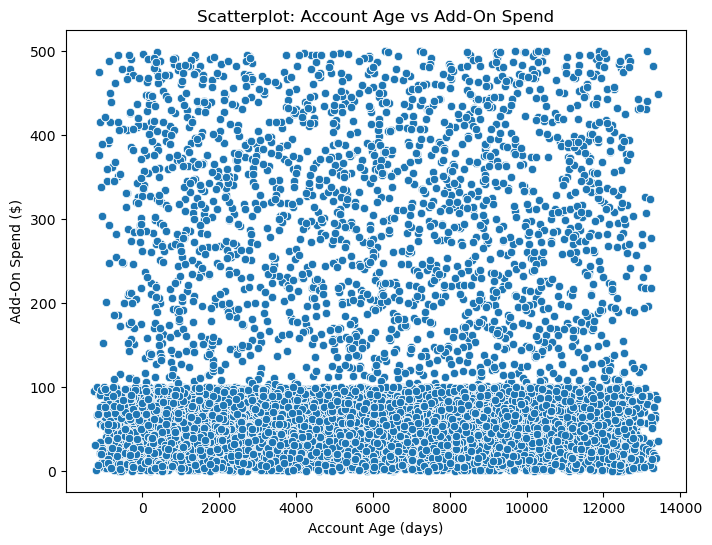

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot between Account Age and Add-On Spend
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Account Age', y='Add-On Spend', data=merged_df)
plt.title('Scatterplot: Account Age vs Add-On Spend')
plt.xlabel('Account Age (days)')
plt.ylabel('Add-On Spend ($)')
plt.show()


In [294]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)

# Print the cross-validation results
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0
